##Concatenate files:

files = glob('./data/train_FD00*.txt')
frames = [wrangle(files) for file in files]
df=pd.concat(frames,axis=0)

df=pd.concat(frames,axis=0)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xg 

pd.set_option('display.max_columns',50)


In [86]:
files = glob('./data/train_FD00*.txt')
files[0]= files[0].replace('\\', '/')
files[0]

'./data/train_FD001.txt'

In [87]:
n_=['']*21
df=[0]*5
ruldf=[0]*5
drop_cols=[0]*5
for i in range(0,21):
    n_[i]='sens_meas_'+str(i+1)
col_names=['unit_no', 'time', 'op_set1', 'op_set2', 'op_set3']+ n_

##Read csvs and assign them to df[1] to df[4]
for n in range(1,5):
    df[n]=pd.read_csv(files[n-1], delimiter=" ", names=col_names, header=None, index_col=False)
    df[n]=df[n].set_index('unit_no')
    
   #Drop columns with a single value accross all rows
    drop_cols[n] = [col for col in df[n]
               if df[n][col].nunique() == 1]
    df[n]=df[n].drop(columns=drop_cols[n])
    
    ##Create Remaining Useful Life column (RUL), which is = to the number of readings before failure 
    # (the last reading for each unit is in this dataset represents failure)
    ruldf[n]=df[n][['time']].groupby(by='unit_no').max()
    for x in ruldf[n].index:
        df[n].loc[x,'RUL'] = ruldf[n].loc[x,'time'] - df[n].loc[x,'time']

 # Wrangle Test
 

In [88]:
files = glob('./data/test_FD00*.txt')
files[0]= files[0].replace('\\', '/')
files[0]

'./data/test_FD001.txt'

 ### Copy function for now, DELETE after wrangle for train and test is done

In [89]:
n_=['']*21
dft=[0]*5
ruldft=[0]*5
drop_cols=[0]*5
for i in range(0,21):
    n_[i]='sens_meas_'+str(i+1)
col_names=['unit_no', 'time', 'op_set1', 'op_set2', 'op_set3']+ n_

##Read csvs and assign them to dft[1] to dft[4]
for n in range(1,5):
    dft[n]=pd.read_csv(files[n-1], delimiter=" ", names=col_names, header=None, index_col=False)
    dft[n]=dft[n].set_index('unit_no')
    
   #Drop columns with a single value accross all rows
    drop_cols[n] = [col for col in dft[n]
               if dft[n][col].nunique() == 1]
    dft[n]=dft[n].drop(columns=drop_cols[n])
    


In [90]:
dft1=dft[1] ##Change this to change dataset
dft1.head()

,time,op_set1,op_set2,sens_meas_2,sens_meas_3,sens_meas_4,sens_meas_6,sens_meas_7,sens_meas_8,sens_meas_9,sens_meas_11,sens_meas_12,sens_meas_13,sens_meas_14,sens_meas_15,sens_meas_17,sens_meas_20,sens_meas_21
unit_no,,,,,,,,,,,,,,,,,,
1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


# Wrangle Test Target

In [91]:
rul_df = pd.read_csv('./data/RUL_FD001.txt', header=None, names=['RUL'])
rul_df=rul_df.set_index(rul_df.index+1) ##Set index to Unit No.

In [92]:
y_test=pd.DataFrame(dft1['time'])
y_test.loc[:,'RUL']=0


In [93]:
# Flag last readings for each unit
for u in rul_df.index:
    y_test.loc[u,'rul_flag'] = (y_test.loc[u,'time'] == y_test.loc[u,'time'].max()).astype(int)


In [94]:
# Lookup RUL in rul_df and calculate the rest of the columns
for i in reversed(range(len(y_test))):
    if y_test.iloc[i,2] == 1:
        y_test.iloc[i,1] = rul_df.loc[y_test.iloc[i].name,(['RUL'])]
    else:
        y_test.iloc[i,1] = y_test.iloc[i+1,1]+1

In [95]:
# Drop all columns except RUL
y_test = y_test.drop(columns=['time', 'rul_flag'])

# Split Data

In [96]:
file_no=1
df1=df[file_no]
target = 'RUL'

# YOUR CODE HERE
y=df1[target]
X=df1.drop(columns=target)

y_test=y_test  #Delete after wrangle
X_test=dft1

assert X_test.shape[0] == y_test.shape[0]

##Delete

ruldf=[0]*5
df=[0]*5

##Read csvs and assign them to df[1] to df[4]
for n in range(1,5):
    df[n]=pd.read_csv(files[n-1], delimiter=" ", names=col_names, header=None, index_col=False)
    df[n]=df[n].set_index('unit_no')
    
    ##Create Remaining Useful Life column (RUL), which is = to the number of readings before failure 
    # (the last reading for each unit is in this dataset represents failure)
    ruldf[n]=df[n][['time']].groupby(by='unit_no').max()
    for x in ruldf[n].index:
        df[n].loc[x,'RUL'] = ruldf[n].loc[x,'time'] - df[n].loc[x,'time']


# Baseline

In [97]:
#Baseline will be mean for now:
y_pred = [y.mean()] * len(y)
print('Mean RUL:', y.mean())
print('Baseline MAE:', mean_absolute_error(y, y_pred))


Mean RUL: 107.80786195530997
Baseline MAE: 56.85860201806482


# Model

### Random Forest Regressor:

In [98]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X,y)

RandomForestRegressor(random_state=42)

In [99]:
print('RFR training MAE:', mean_absolute_error(y, regr.predict(X)))
print('RFR test MAE:', mean_absolute_error(y_test.loc[(y_test.index<=5) & (y_test.index>1)], 
                                           regr.predict(X_test.loc[(X_test.index<=5) & (X_test.index>1)])))

RFR training MAE: 9.373494740923853
RFR test MAE: 14.334459102902374


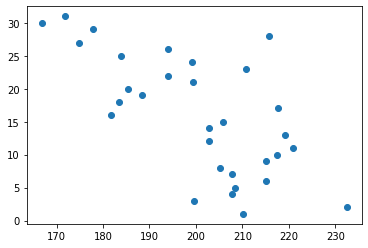

In [100]:
plt.scatter(regr.predict(X_test.loc[X_test.index==1]),X_test.loc[X_test.index == 1, 'time'])


In [28]:
df1

,time,op_set1,op_set2,sens_meas_2,sens_meas_3,sens_meas_4,sens_meas_6,sens_meas_7,sens_meas_8,sens_meas_9,sens_meas_11,sens_meas_12,sens_meas_13,sens_meas_14,sens_meas_15,sens_meas_17,sens_meas_20,sens_meas_21,RUL
unit_no,,,,,,,,,,,,,,,,,,,
1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191.0
1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190.0
1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189.0
1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188.0
1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4.0
100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3.0
100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2.0


### Logistic Regression

In [101]:
model_lr = LogisticRegression()


model_lr.fit(X,y)

c:\users\ncarv\.virtualenvs\github-ka8fdyb0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
print('LR training MAE:', mean_absolute_error(y, model_lr.predict(X)))
print('LR test MAE:', mean_absolute_error(y_test, model_lr.predict(X_test)))

LR training MAE: 35.87014686636615
LR test MAE: 39.872251069028714


### XGBoost

In [103]:
# Instantiation 
model_xg = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 5) 
  
# Fitting the model 
model_xg.fit(X, y) 
  
# Predict the model 
pred = model_xg.predict(X_test) 


In [104]:
model=model_xg
print('LR training MAE:', mean_absolute_error(y, model.predict(X)))
print('LR test MAE:', mean_absolute_error(y_test, model.predict(X_test)))
# # RMSE Computation 
# rmse = np.sqrt(MSE(y_test, pred)) 
# print("RMSE : % f" %(rmse)) 

LR training MAE: 27.09982753563861
LR test MAE: 34.897739415643564


# Figures:

## Time vs. RUL

Text(0.5, 1.0, 'time')

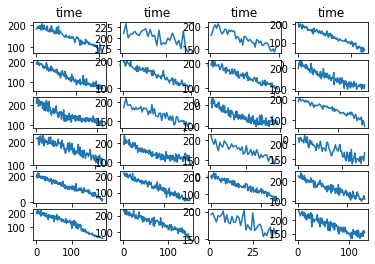

In [106]:
# time vs. RUL
data = X_test
set_=4
first=set_*24+1
start = first%24
end = start+24
cols=data.columns
col = 'time'


fig, axs = plt.subplots(6, 4)
for c in range(start,end):
    if 1<=c<=4:
        axs[0,c%4].plot(data.loc[data.index == c, col], regr.predict(data.loc[data.index == c]))
    if 5<=c<=8:
        axs[1,c%4].plot(data.loc[data.index == c, col], regr.predict(data.loc[data.index == c]))
    if 9<=c<=12:
        axs[2,c%4].plot(data.loc[data.index == c, col], regr.predict(data.loc[data.index == c]))
    if 13<=c<=16:
        axs[3,c%4].plot(data.loc[data.index == c, col], regr.predict(data.loc[data.index == c]))
    if 17<=c<=20:
        axs[4,c%4].plot(data.loc[data.index == c, col], regr.predict(data.loc[data.index == c]))
    if 21<=c<=24:
        axs[5,c%4].plot(data.loc[data.index == c, col], regr.predict(data.loc[data.index == c]))
#     
axs[0, 0].set_title(col)
axs[0, 1].set_title(col)
axs[0, 2].set_title(col)
axs[0, 3].set_title(col)



Text(0.5, 1.0, 'sens_meas_9')

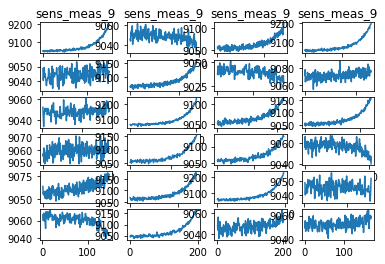

In [121]:
# time vs. sensor
data = df1
set_=4
first=set_*24+1
start = first%24
end = start+24
cols=data.columns
col = cols[9]


fig, axs = plt.subplots(6, 4)
for c in range(start,end):
    if 1<=c<=4:
        axs[0,c%4].plot(data.loc[data.index == c, 'time'], data.loc[data.index == c, col])
    if 5<=c<=8:
        axs[1,c%4].plot(data.loc[data.index == c, 'time'], data.loc[data.index == c, col])
    if 9<=c<=12:
        axs[2,c%4].plot(data.loc[data.index == c, 'time'], data.loc[data.index == c, col])
    if 13<=c<=16:
        axs[3,c%4].plot(data.loc[data.index == c, 'time'], data.loc[data.index == c, col])
    if 17<=c<=20:
        axs[4,c%4].plot(data.loc[data.index == c, 'time'], data.loc[data.index == c, col])
    if 21<=c<=24:
        axs[5,c%4].plot(data.loc[data.index == c, 'time'], data.loc[data.index == c, col])
#     
axs[0, 0].set_title(col)
axs[0, 1].set_title(col)
axs[0, 2].set_title(col)
axs[0, 3].set_title(col)



In [72]:
plt.ylabel?

KeyError: 'sens_meas_5'

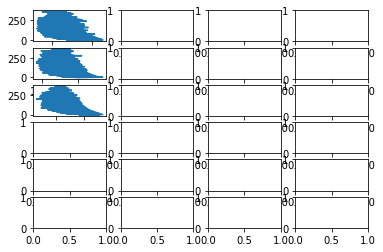

In [29]:
fig, axs = plt.subplots(6, 4)
for n in range(1,5):
    axs[0,n-1].plot(df[n]['sens_meas_2'], df[n]['RUL'])
    axs[1,n-1].plot(df[n]['sens_meas_3'], df[n]['RUL'])
    axs[2,n-1].plot(df[n]['sens_meas_4'], df[n]['RUL'])
    axs[3,n-1].plot(df[n]['sens_meas_5'], df[n]['RUL'])
    axs[4,n-1].plot(df[n]['sens_meas_6'], df[n]['RUL'])
    axs[5,n-1].plot(df[n]['sens_meas_7'], df[n]['RUL'])
#     
axs[0, 0].set_title('Dataset 1')
axs[0, 1].set_title('Dataset 2')
axs[0, 2].set_title('Dataset 3')
axs[0, 3].set_title('Dataset 4')
    
for ax in axs.flat:
    ax.label_outer()
    


fig, axs = plt.subplots(4, 4)
axs[0, 0].plot(df[1]['sens_meas_2'], df[1]['RUL'])
axs[0, 0].set_title('Dataset 1')

axs[0, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 1].set_title('Dataset 2')

axs[0, 2].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 2].set_title('Dataset 3')

axs[0, 3].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
axs[0, 3].set_title('Dataset 4')

# axs[0, 4].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
# axs[0, 4].set_title('Dataset 4')

axs[1, 0].plot(df[1]['time'], df[1]['RUL'], 'tab:green')

axs[1, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:red')
axs[0, 2].plot(df[1]['op_set1'], df[1]['RUL'], 'tab:red')


for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
ax.autoscale()

fig, axs = plt.subplots(4, 4)
axs[0, 0].plot(df[1]['time'], df[1]['sens_meas_2'])
axs[0, 0].set_title('Dataset 1')

axs[0, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 1].set_title('Dataset 2')

axs[0, 2].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 2].set_title('Dataset 3')

axs[0, 3].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
axs[0, 3].set_title('Dataset 4')

# axs[0, 4].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
# axs[0, 4].set_title('Dataset 4')

axs[1, 0].plot(df[1]['time'], df[1]['RUL'], 'tab:green')

axs[1, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:red')
axs[0, 2].plot(df[1]['op_set1'], df[1]['RUL'], 'tab:red')


for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
ax.autoscale()

Complete these tasks for your project, and document your decisions.

Choose your target. Which column in your tabular dataset will you predict?
**The column to be used is the 'Remaining Useful Life' column**
Is your problem regression or classification?
**Classification**
How is your target distributed?

Classification: How many classes? Are the classes imbalanced?
Regression: Is the target right-skewed? If so, you may want to log transform the target.
Choose your evaluation metric(s).
**The nature of the data makes this target neither left nor right skewed**

Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
**Probably RMSE and R2**
Choose which observations you will use to train, validate, and test your model.
**All**
Are some observations outliers? Will you exclude them?
**Haven't found any, only will exclude columns where all values are the same**
Will you do a random split or a time-based split?
**Data is already split randomly**
Begin to clean and explore your data.
Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [107]:
df1=pd.read_csv('./data/RUL_FD001.txt', header=None)
df1

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117
